**Time-series forecasting for female biths in CA**

In [0]:
# import libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [116]:
# read file -csv 
# index as date column and that change to date format 
femaledb_df = pd.read_csv("daily-total-female-births-CA.csv",index_col=[0], parse_dates=[0])
femaledb_df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [117]:
femaledb_df.size

365

In [118]:
femaledb_df.isnull()

,births
date,
1959-01-01,False
1959-01-02,False
1959-01-03,False
1959-01-04,False
1959-01-05,False
...,...
1959-12-27,False
1959-12-28,False
1959-12-29,False


In [119]:
Isnull = femaledb_df.isnull().sum()/len(femaledb_df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Series([], dtype: float64)

In [120]:
femaledb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [121]:
print(femaledb_df.describe())
print(femaledb_df.describe(include='all'))

           births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000
           births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


In [0]:
#femaledb_df['date']=pd.to_datetime(femaledb_df['date'])
#femaledb_df['date']

In [123]:
femaledb_df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [0]:
#femaledb_df.index = pd.to_datetime(femaledb_df['date'])
#femaledb_df.head()

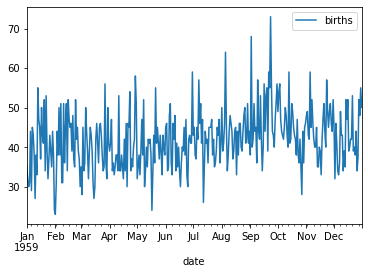

In [125]:
femaledb_df.plot() #almost a stationary series

In [0]:
# also called as smoothing
moving_average_birth=femaledb_df.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [127]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


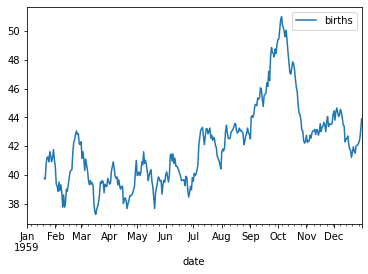

In [128]:
moving_average_birth.plot() # we can see that there is a peak in the month of october

In [129]:
# check for the correlation - whether it has high/low correlation - less than 2 then it has less correlation 
sm.stats.durbin_watson(femaledb_df) # very less correlation 

array([0.04624491])

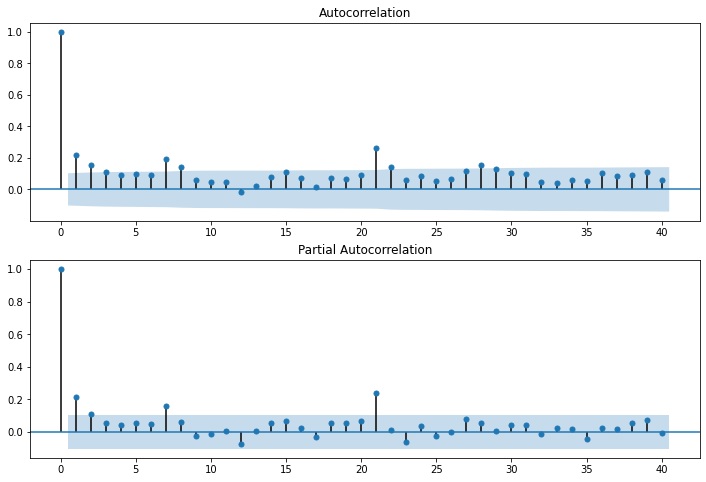

In [130]:
# show plots of ACF and PACF 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(femaledb_df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(femaledb_df, lags=40, ax=ax2)

In [0]:
training_data = femaledb_df[0:320]
testing_data = femaledb_df[320:]

In [0]:
#from sklearn.model_selection import train_test_split
#t_x,t=train_test_split(femaledb_df)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [134]:
arima= ARIMA(training_data,order=(2,1,3))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [0]:
model=arima.fit()

In [136]:
model.aic

2164.7000235096853

In [0]:
pred= model.forecast(steps=45)[0]

In [138]:
pred

array([43.11692539, 44.26288339, 43.64699533, 43.03627784, 44.07952837,
       43.97580466, 43.10805061, 43.84694947, 44.19520792, 43.30168089,
       43.63315351, 44.28699795, 43.56576065, 43.49076833, 44.26319829,
       43.84247522, 43.44840485, 44.15844414, 44.08099101, 43.50858035,
       44.01882133, 44.24711624, 43.6515478 , 43.89013319, 44.32780042,
       43.84322732, 43.8081907 , 44.33037733, 44.04486389, 43.79285562,
       44.27759245, 44.22206526, 43.84647789, 44.2001792 , 44.35139836,
       43.95632477, 44.12897563, 44.4235476 , 44.09981663, 44.08833766,
       44.4429374 , 44.2509843 , 44.09203522, 44.42449092, 44.38656823,
       44.14209002, 44.38869465, 44.49051995, 44.23031033, 44.35630352,
       44.55621434, 44.34174482, 44.34387472, 44.58628439, 44.4589984 ])

In [0]:
from sklearn.metrics import mean_squared_error

In [143]:
np.sqrt(mean_squared_error(testing_data,pred))

6.612985732114454